<a href="https://colab.research.google.com/github/adancalderon/MLintro/blob/main/COMP4980ML_W22_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
import numpy as np
(X_train, _), (X_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))
    plt.gray()

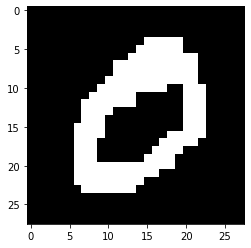

In [ ]:
show_image(X_train[1])

In [ ]:
code_size= 32

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
from keras.layers import Dense, Flatten, Reshape, InputLayer
from keras.models import Sequential, Model
from keras import regularizers

def build_autoencoder(img_shape, code_size):
  encoder = Sequential()
  encoder.add(InputLayer(img_shape))
  encoder.add(Flatten())
  encoder.add(Dense(code_size, activation='relu',
                     activity_regularizer = regularizers.l1(10e-4)))

  decoder = Sequential()
  decoder.add(InputLayer((code_size,)))
  decoder.add(Dense(np.prod(img_shape), activation='sigmoid'))
  decoder.add(Reshape(img_shape))

  return encoder, decoder




In [ ]:
from keras.layers import Input

IMG_SHAPE = X_train.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, code_size)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp, reconstruction)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
print (autoencoder.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 sequential_12 (Sequential)  (None, 32)                25120     
                                                                 
 sequential_13 (Sequential)  (None, 28, 28)            25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256,
                validation_data=(X_test, X_test))

Epoch 1/10
235/235 [==============================] - 4s 17ms/step - loss: 0.3365 - val_loss: 0.2291
Epoch 2/10
235/235 [==============================] - 4s 15ms/step - loss: 0.2092 - val_loss: 0.1935
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1866 - val_loss: 0.1768
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1714 - val_loss: 0.1648
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1621 - val_loss: 0.1570
Epoch 6/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1551 - val_loss: 0.1504
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1490 - val_loss: 0.1452
Epoch 8/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1447 - val_loss: 0.1415
Epoch 9/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1414 - val_loss: 0.1386
Epoch 10/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1388 - val_lo

In [ ]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

In [ ]:
encoder.predict(X_test).mean()

0.7359731

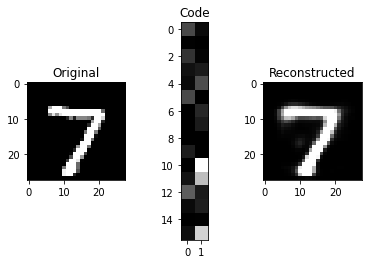

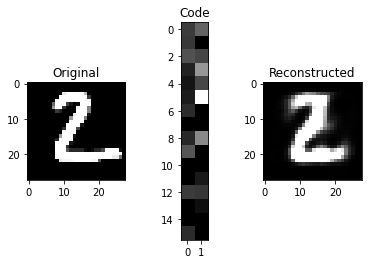

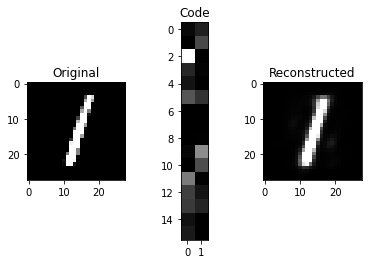

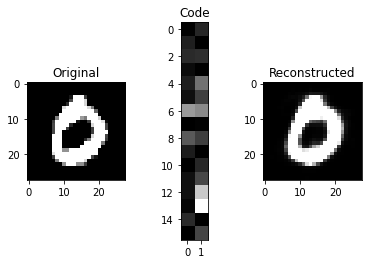

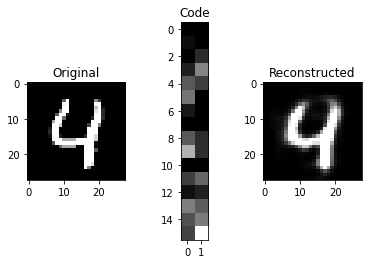

In [ ]:
for i in range(5):
    img = X_test[i]
    visualize(img,encoder,decoder)

In [ ]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0, 1)
X_test_noisy = np.clip(X_test_noisy, 0, 1)
                                                        
                                                      


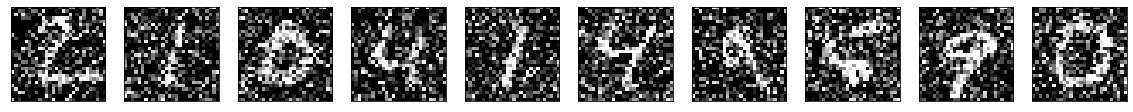

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder.fit(X_train_noisy, X_train, epochs = 10, batch_size = 256,
                shuffle=True, validation_data=(X_test_noisy, X_test)  )

Epoch 1/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1447 - val_loss: 0.1299
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1299 - val_loss: 0.1269
Epoch 3/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1277 - val_loss: 0.1257
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1266 - val_loss: 0.1247
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1258 - val_loss: 0.1242
Epoch 6/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1253 - val_loss: 0.1240
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1249 - val_loss: 0.1236
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1247 - val_loss: 0.1234
Epoch 9/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1244 - val_loss: 0.1232
Epoch 10/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1242 - val_lo

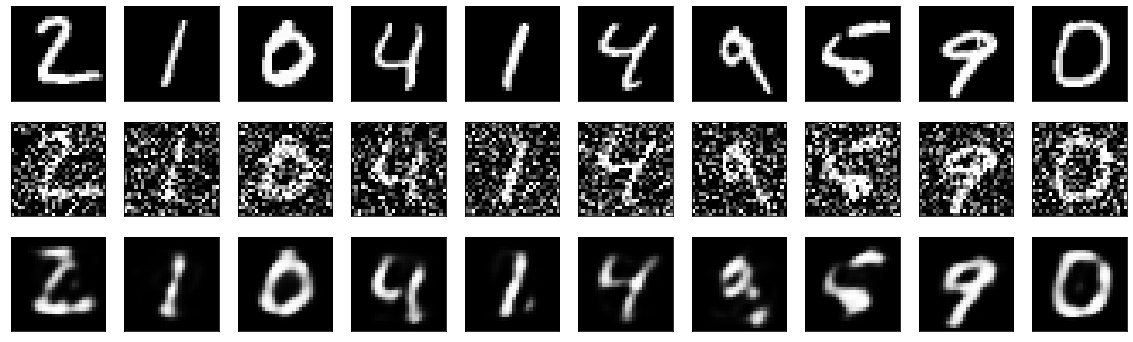

In [ ]:
n = 10
denoised = autoencoder.predict(X_test_noisy[:n+1])
plt.figure(figsize=(20, 6))
plt.gray()
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(X_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i+10)
    plt.imshow(X_test_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i+20)
    plt.imshow(denoised[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()